# MNIST CNN 

###  *a handwritten single digit recognizer*

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


## CNN architecture
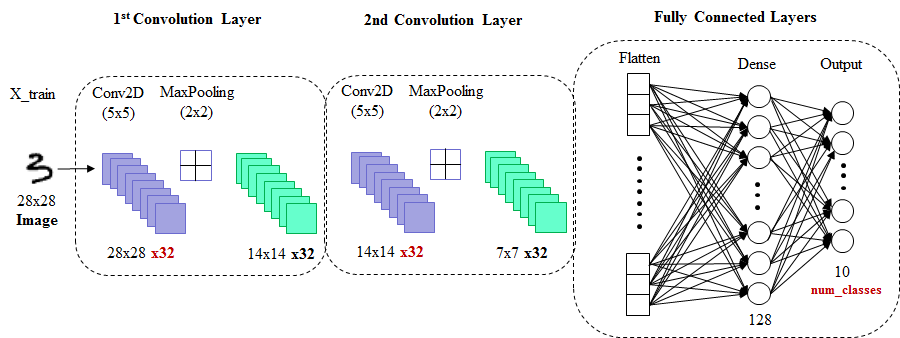

In [2]:
# Import Libraries
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

import matplotlib.pyplot as plt

## Dataset

In [3]:
# Load Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)

(60000, 28, 28)


[ 8946 59289 48010 48089 41373 19707 49395 40795]


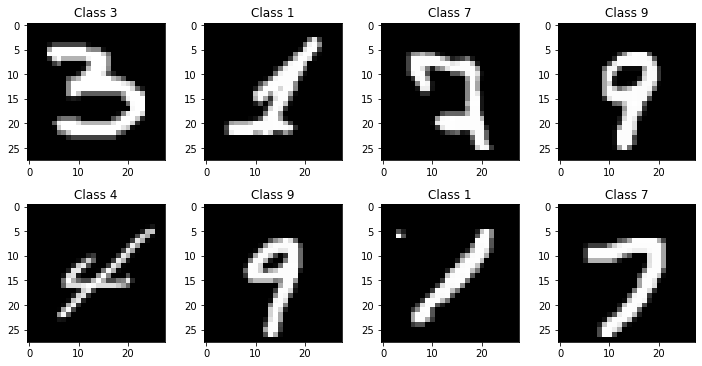

In [5]:
# Show image of training data
plt.figure(figsize = (10, 10)) # set size of figure 10x10
rand_indexes = np.random.randint(0, x_train.shape[0], 8) # select 8 digits(0~9) randomly 
print(rand_indexes)
for index,im_index in enumerate(rand_indexes):
    plt.subplot(4, 4, index+1)
    plt.imshow(x_train[im_index], cmap = 'gray', interpolation = 'none')
    plt.title('Class %d' % y_train[im_index])
plt.tight_layout()

In [6]:
# data convert to floating point
#x_train = x_train.astype('float32') / 255
x_train = x_train / 255.0
#x_test = x_test.astype('float32') / 255
x_test = x_test / 255.0
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [7]:
print(x_test.shape)

(10000, 28, 28)


In [8]:
img_rows, img_cols = 28, 28 # input image dimensions

if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [9]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
num_classes = y_train.shape[1]

In [10]:
print(y_train.shape)
print(y_test.shape)
print(num_classes)

(60000, 10)
(10000, 10)
10


## Build Model

In [11]:
# Build Model
model = Sequential()
# 1st Conv layer
model.add(Conv2D(32, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = input_shape))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
# 2nd Conv layer        
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
# Fully Connected layer        
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [12]:
# Compile Model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

## Train Model

In [13]:
# Train Model
num_epochs = 30
history = model.fit(x_train, y_train, batch_size = 128, epochs = num_epochs, verbose = 1, validation_data=(x_test, y_test));

Epoch 1/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2606 - accuracy: 0.9192 - val_loss: 0.0586 - val_accuracy: 0.9807
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0794 - accuracy: 0.9756 - val_loss: 0.0421 - val_accuracy: 0.9859
Epoch 3/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0571 - accuracy: 0.9824 - val_loss: 0.0305 - val_accuracy: 0.9896
Epoch 4/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0486 - accuracy: 0.9848 - val_loss: 0.0271 - val_accuracy: 0.9914
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0399 - accuracy: 0.9875 - val_loss: 0.0245 - val_accuracy: 0.9905
Epoch 6/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0366 - accuracy: 0.9887 - val_loss: 0.0269 - val_accuracy: 0.9912
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0306 - accuracy: 0.9898 - val_loss: 0.0215 - val_accuracy: 0.9925
Epoch 

In [14]:
# Save Model
model.save('mnist_cnn.h5')

## Evaluate Model

In [15]:
# Evaluate Model
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.025275884196162224
Test accuracy:  0.9923999905586243


## Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


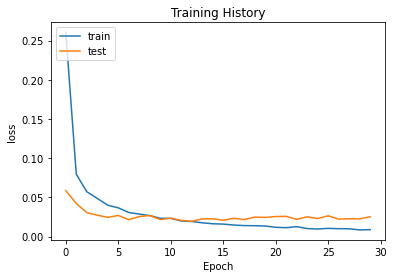

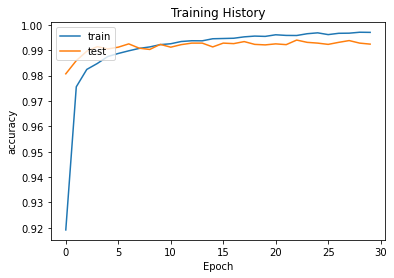

In [16]:
# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

## Exercises to improve accuracy
### *1. change Conv kernel_size from 5x5 to 3x3 (smaller filter)*
### *2. double Conv in Conv layer  (add another Conv2D after Conv2D)*
### *3. add 3rd Conv layer (128)*
### *4. double FC layers (add Dense(64))*
### *5. smaller batch_size*
### *6. train MORE epochs*